<a href="https://colab.research.google.com/github/Kabshah/AI-try/blob/main/LinearRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [11]:
df = pd.read_csv("Car_Purchasing_Data.csv")

In [12]:
print("Dataset shape:", df.shape)

Dataset shape: (500, 9)


In [13]:
print("\nData types:\n", df.dtypes)


Data types:
 Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object


In [14]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64


In [15]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [16]:
# 4. Quick summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
            Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.224000   62127.239608       9607.645049   
std      0.500465    7.990339   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   41.000000   54391.977195       7397.515792   
50%      1.000000   46.000000   62915.497035       9655.035568   
75%      1.000000   52.000000   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000  

univariate analysis

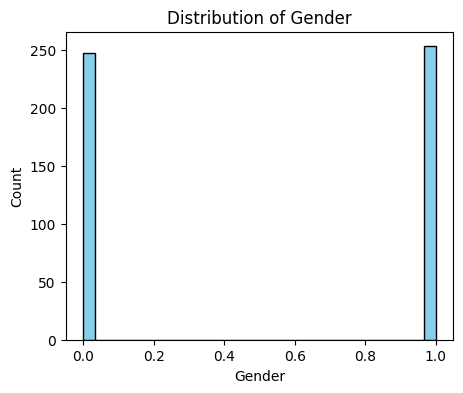

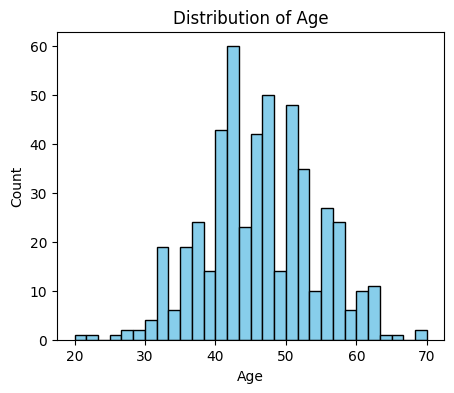

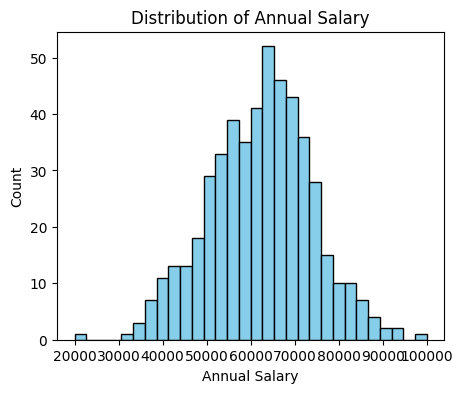

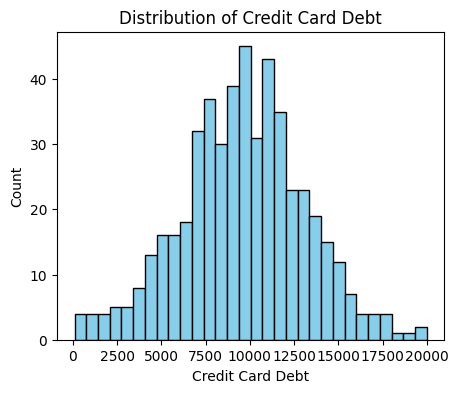

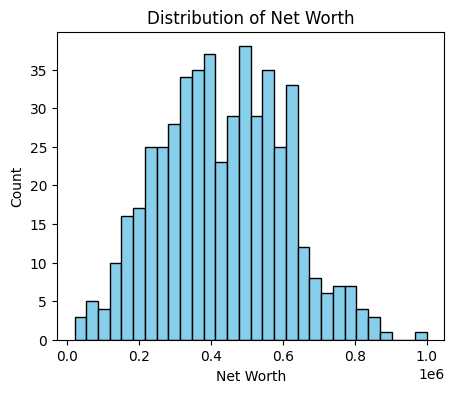

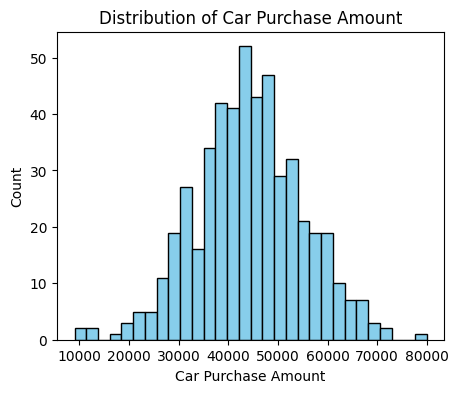

In [17]:
cols_to_plot = ["Gender", "Age", "Annual Salary", "Credit Card Debt", "Net Worth", "Car Purchase Amount"]
for col in cols_to_plot:
    plt.figure(figsize=(5,4))
    plt.hist(df[col], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

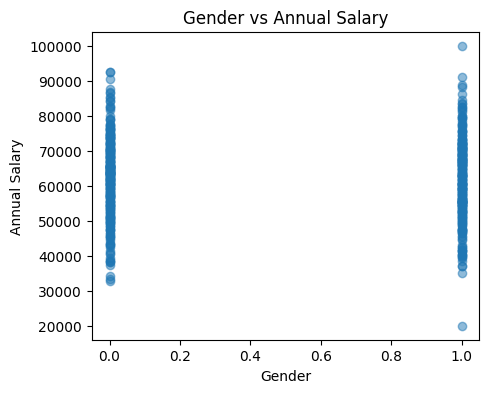

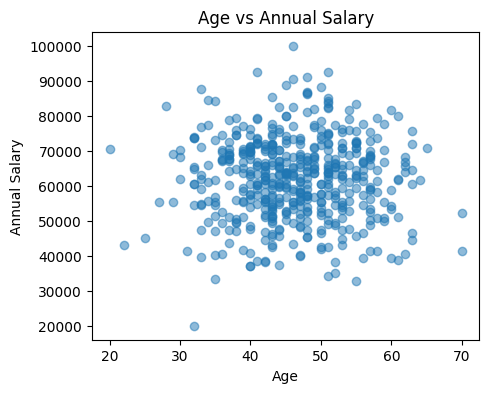

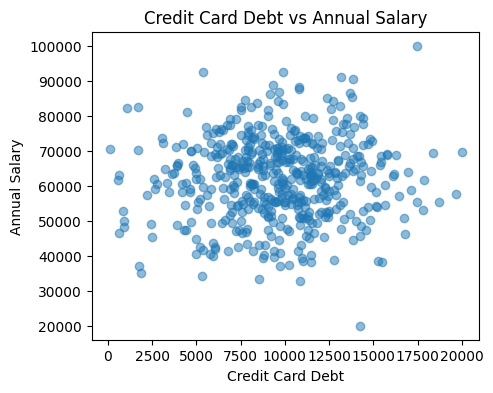

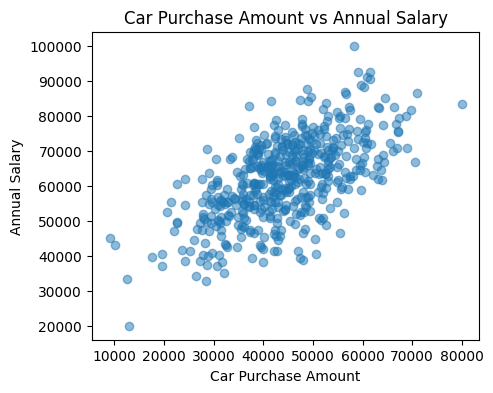

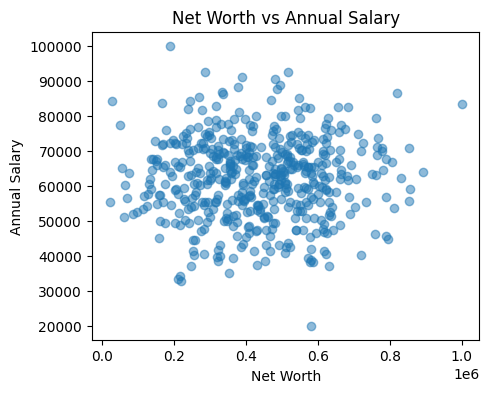

In [23]:
features =  ["Gender", "Age", "Credit Card Debt", "Car Purchase Amount","Net Worth"]
for col in features:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df["Annual Salary"], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Annual Salary")
    plt.title(f"{col} vs Annual Salary")
    plt.show()

In [25]:
useful_features = ["Gender", "Age", "Annual Salary", "Credit Card Debt", "Net Worth"]

X = df[useful_features]        # features
y = df["Car Purchase Amount"]  # target


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
print("\nTraining rows:", X_train.shape[0])
print("Testing rows:", X_test.shape[0])


Training rows: 400
Testing rows: 100


In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
# 12. Predictions and Evaluation
y_pred = linreg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel performance on Test Set:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Model performance on Test Set:
R²: 0.9994
MSE: 62253.9659
RMSE: 249.5074
MAE: 212.7210


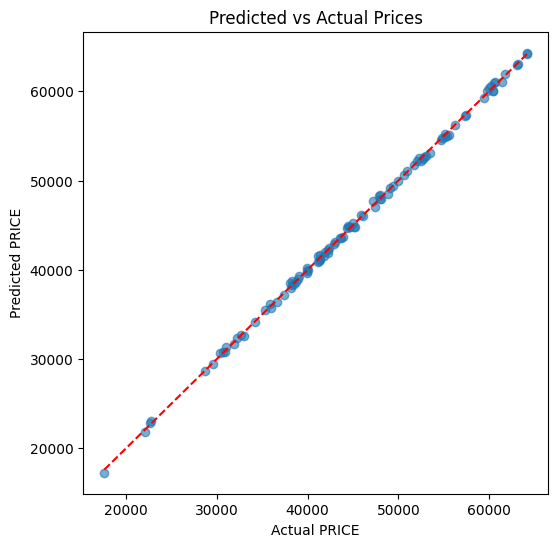

In [33]:
# 13. Diagnostic plots
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual PRICE")
plt.ylabel("Predicted PRICE")
plt.title("Predicted vs Actual Prices")
plt.show()

In [35]:
 # Model coefficients and intercept
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)


Intercept: -42115.83341847092
Coefficients: [4.28270310e+01 8.39371100e+02 5.62401750e-01 8.09907086e-03
 2.89307666e-02]
